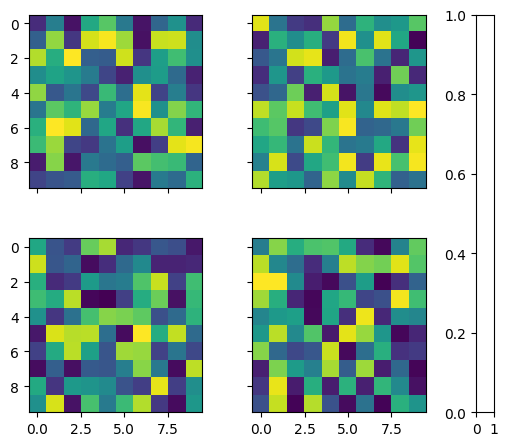

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from matplotlib.animation import FuncAnimation

# Parameters
nrows, ncols = 2, 2  # Grid size
frames = 100         # Number of animation frames

# Create a figure and ImageGrid
fig = plt.figure(figsize=(6, 6))
grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=0.5, cbar_mode='single')

# Initialize data for the grid
data = [np.random.rand(10, 10) for _ in range(nrows * ncols)]

# Create images in the grid
images = [ax.imshow(data[i], cmap='viridis', vmin=0, vmax=1) for i, ax in enumerate(grid)]

# Animation update function
def update(frame):
    for img in images:
        new_data = np.random.rand(10, 10)  # Generate new data
        img.set_array(new_data)
    return images

# Create the animation
ani = FuncAnimation(fig, update, frames=frames, blit=True)

# Show the animation
ani.save('animation.mp4', writer='ffmpeg', fps=30)
